# Project Topic
For my project, I aim to analyze a dataset on heart failure that has medical records of 299 patients. The 'heart_faliure.csv' dataset consists of 13 distinct clinical features, including a patient's age, blood related attributes, various medical conditions, and a follow up time period from the amount of time the patient spent out of the hospital. The primary objective of my project is to investigate the factors associated with heart failure deaths by analyzing the dataset, aiming to determine the likelihood of a patient experiencing a heart failure related death. Given that my project's focus is to predict patient mortality based on the available clinical data, my analysis will include classification methods commonly used for binary outcomes, as well as a logistic regression model which is also good for binary outcomes. Throughout my project, my aim is to uncover valuable insights into the risk factors linked to heart failure related deaths. By identifying patients at higher risk, this analysis could potentially facilitate early interventions, leading to improved patient care and hopefully being able to catch the chance of death earlier to protect against it, in order to save lives. The data set was found on one of the provided websites on the project guide html, which I used the UCI ML Data Repository. The specific data set was collected in a an experiment by Davide Chicco and Giuseppe Jurman where they used Machine learning to predict the survival of patients with heart failure from only serum creatinine and ejection fraction.


The Data Set has the following 13 attributes:
- age: age of the patient in years
- anaemia: decrease of red blood cells or hemoglobin in boolean
- high blood pressure: if the patient has hypertension in boolean
- creatinine phosphokinase(CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes in boolean
- ejection fraction: percentage of blood leaving the heart at each contraction
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man in binary
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not in boolean
- time: follow-up period in days
-----
- death event: if the patient deceased during the follow-up period in boolean


I found in this dataset that there were no missing values by checking the sum of all num values in dfData.


Citation copied from UCI website: 


Heart failure clinical records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.

In [1]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Note: you may need to restart the kernel to use updated packages.


# Visualizations and Data Statistics

Shape of the dataframe: (299, 13)
First few rows of the dataframe:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0    

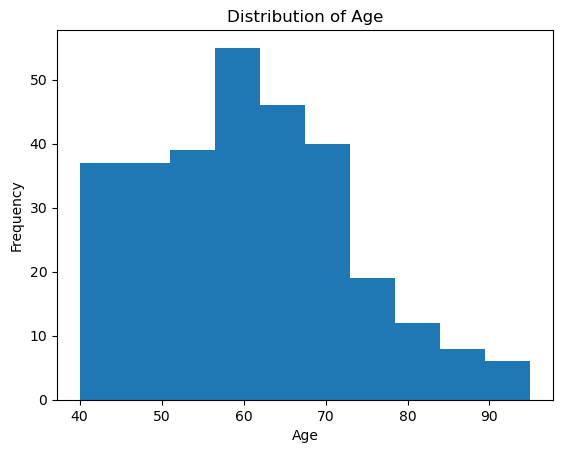

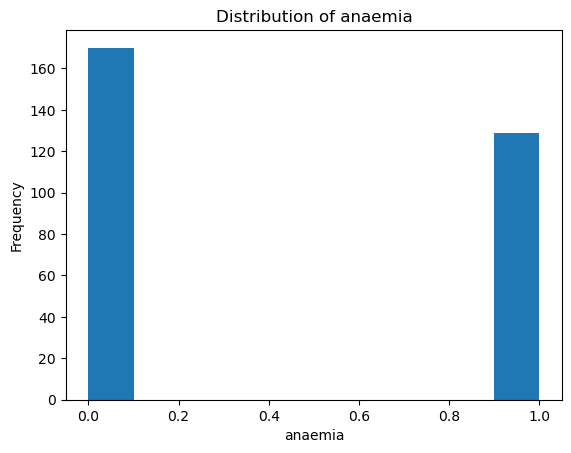

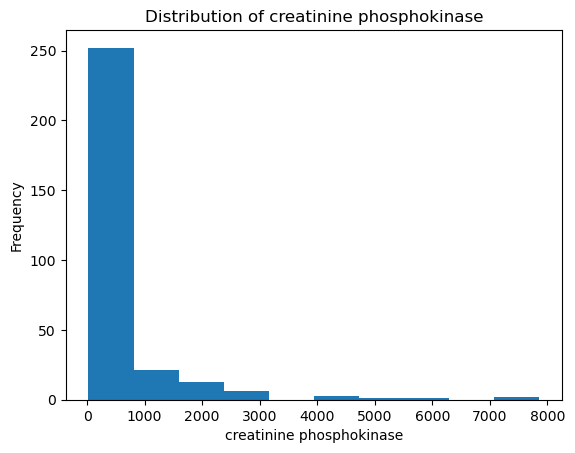

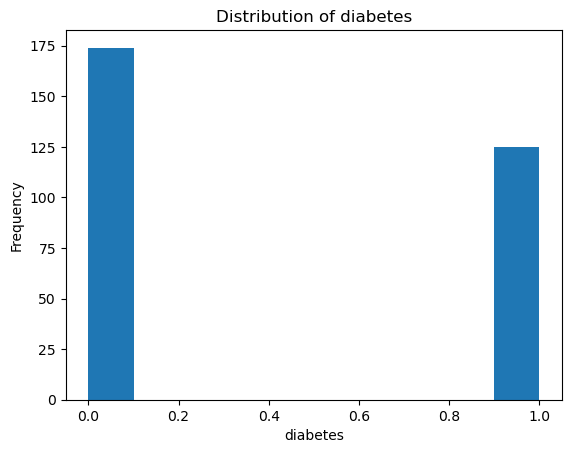

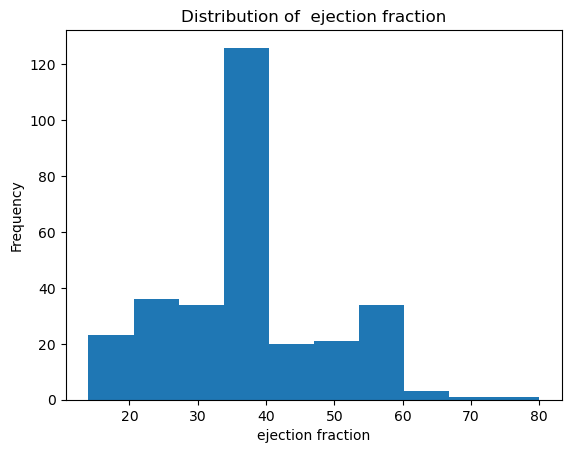

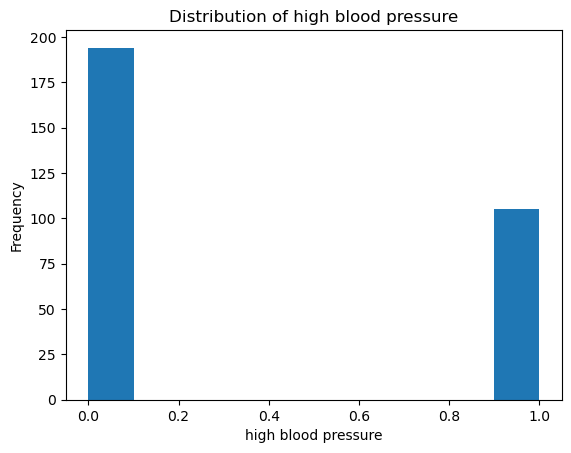

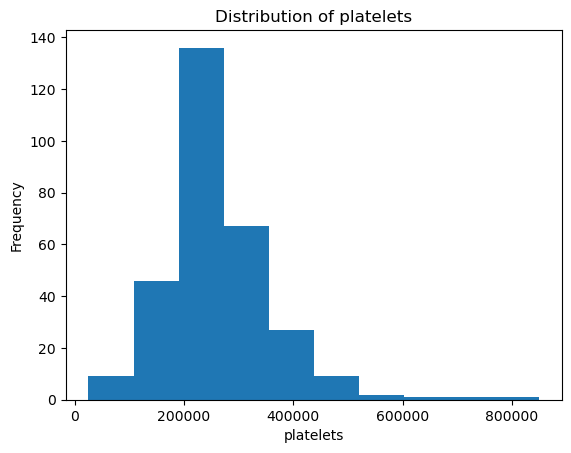

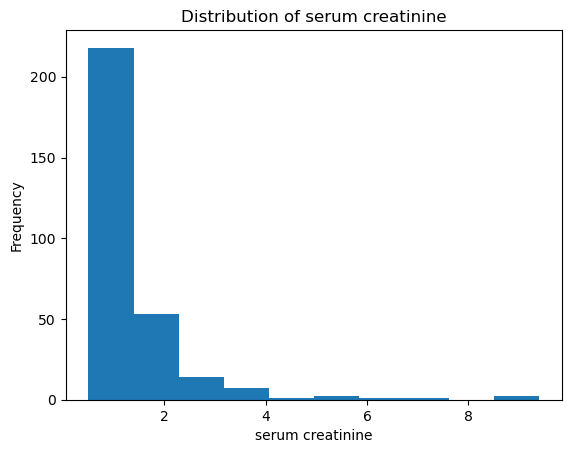

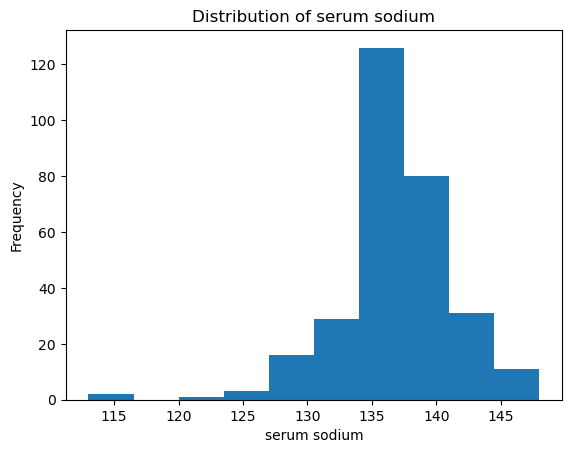

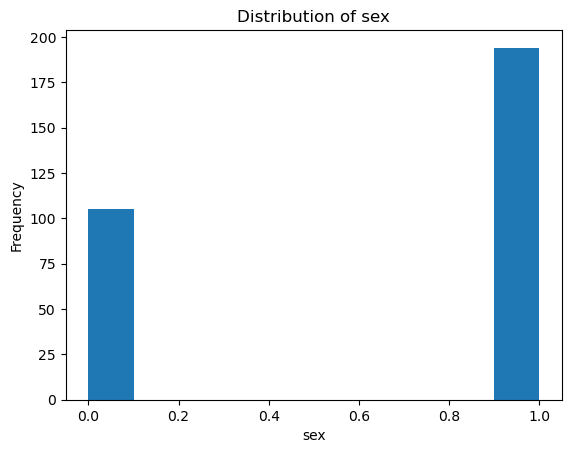

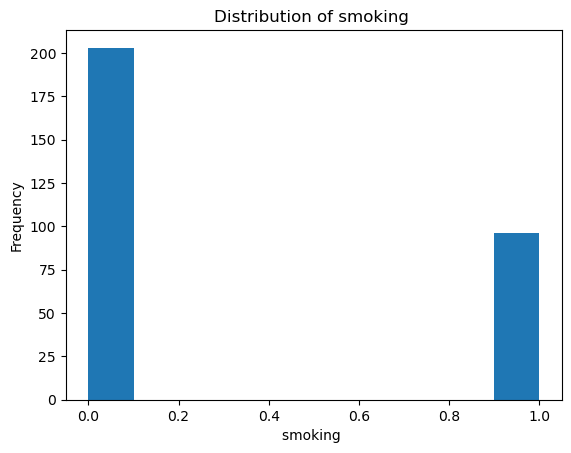

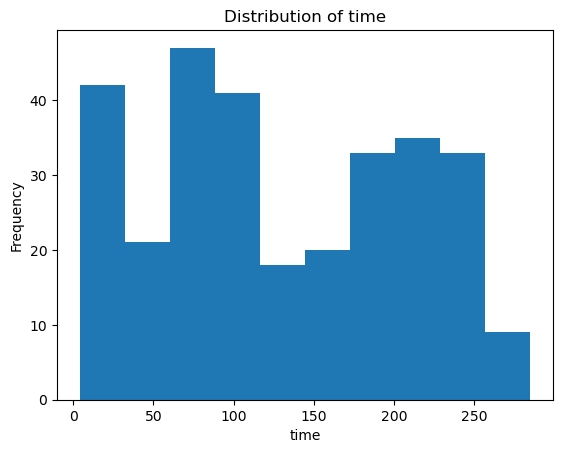

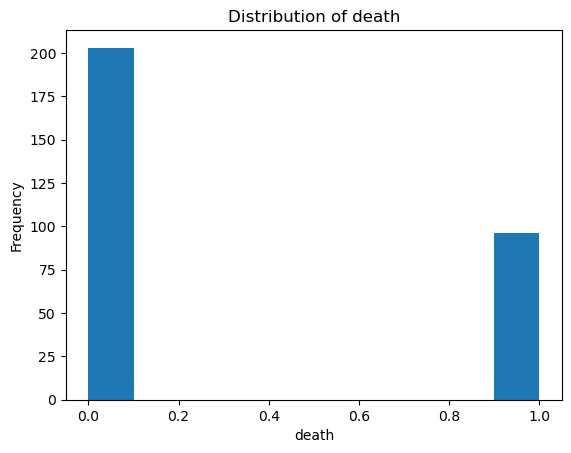

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectFromModel, chi2
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn import metrics

dfData=pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("Shape of the dataframe:",dfData.shape)
print("First few rows of the dataframe:")
print(dfData.head())
print("Data statistics:")
print(dfData.describe())
print("Missing values:")
print(dfData.isnull().sum())

plt.hist(dfData['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

plt.hist(dfData['anaemia'], bins=10)
plt.xlabel('anaemia')
plt.ylabel('Frequency')
plt.title('Distribution of anaemia')
plt.show()

plt.hist(dfData['creatinine_phosphokinase'], bins=10)
plt.xlabel('creatinine phosphokinase')
plt.ylabel('Frequency')
plt.title('Distribution of creatinine phosphokinase')
plt.show()

plt.hist(dfData['diabetes'], bins=10)
plt.xlabel('diabetes')
plt.ylabel('Frequency')
plt.title('Distribution of diabetes')
plt.show()

plt.hist(dfData['ejection_fraction'], bins=10)
plt.xlabel('ejection fraction')
plt.ylabel('Frequency')
plt.title('Distribution of  ejection fraction')
plt.show()

plt.hist(dfData['high_blood_pressure'], bins=10)
plt.xlabel('high blood pressure')
plt.ylabel('Frequency')
plt.title('Distribution of high blood pressure')
plt.show()

plt.hist(dfData['platelets'], bins=10)
plt.xlabel('platelets')
plt.ylabel('Frequency')
plt.title('Distribution of platelets')
plt.show()

plt.hist(dfData['serum_creatinine'], bins=10)
plt.xlabel('serum creatinine')
plt.ylabel('Frequency')
plt.title('Distribution of serum creatinine')
plt.show()

plt.hist(dfData['serum_sodium'], bins=10)
plt.xlabel('serum sodium')
plt.ylabel('Frequency')
plt.title('Distribution of serum sodium')
plt.show()

plt.hist(dfData['sex'], bins=10)
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.title('Distribution of sex')
plt.show()

plt.hist(dfData['smoking'], bins=10)
plt.xlabel('smoking ')
plt.ylabel('Frequency')
plt.title('Distribution of smoking ')
plt.show()

plt.hist(dfData['time'], bins=10)
plt.xlabel('time')
plt.ylabel('Frequency')
plt.title('Distribution of time')
plt.show()

plt.hist(dfData['DEATH_EVENT'], bins=10)
plt.xlabel('death')
plt.ylabel('Frequency')
plt.title('Distribution of death')
plt.show()

Conclusion:

The data set has no missing values and all 13 attributes have a possibility of leading me towards finding a certain connection between the two, leaving me with no choice but to keep all the data since as of now it is all clean and useable. A forseen problem I can see arising in this problem would be how this dataset might be insuffieicent due to their only being 299 patients, which I feel is relativley small for an analysis. I also can forsee there being a problem since this is a binary outcome there can be a chance of class imbalance which I feel can mess with the accuracy of the results. 

# Data Cleaning and Exploratory Data Analysis

In [3]:
header = {0: 'age', 1: 'anaemia', 2: 'creatinine_phosphokinase', 3: 'diabetes', 4: 'ejection_fraction', 5: 'high_blood_pressure', 6: 'platelets', 7: 'serum_creatinine', 8: 'serum_sodium', 9: 'sex', 10: 'smoking',11: 'time', 12: 'DEATH_EVENT'}
dfData = dfData.rename(columns=header)
print("Basic Statistical Descriptions of the Data:")
print(dfData.describe())

Basic Statistical Descriptions of the Data:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000

In [4]:
dfData.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Numerical Factors

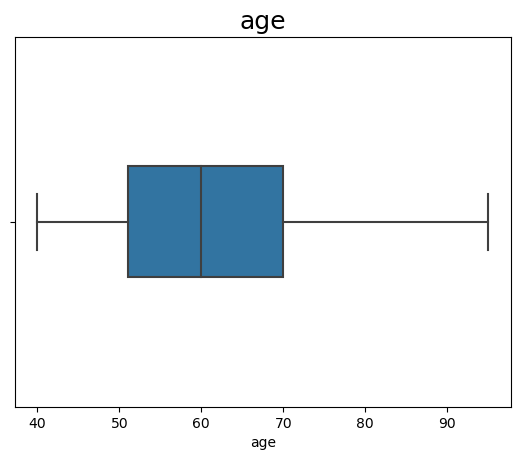

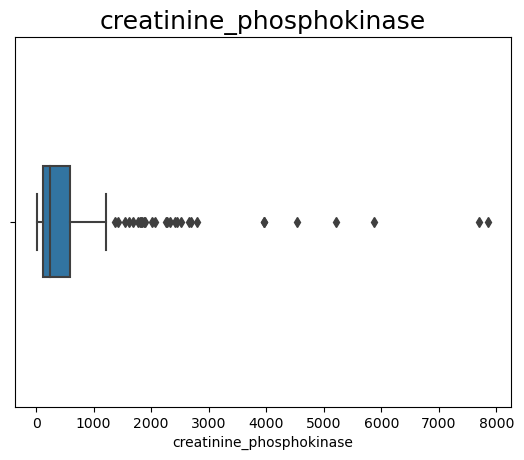

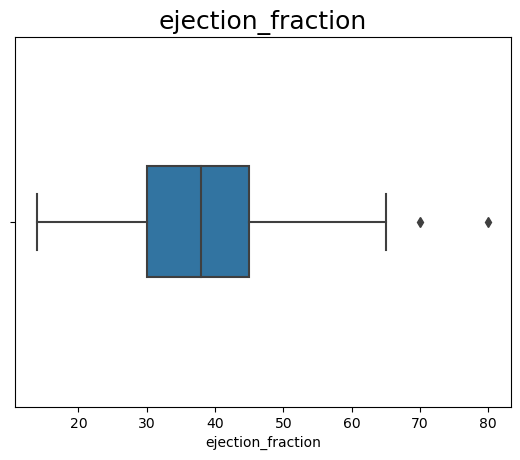

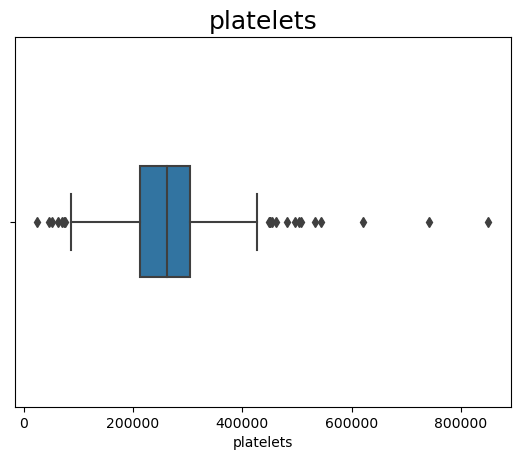

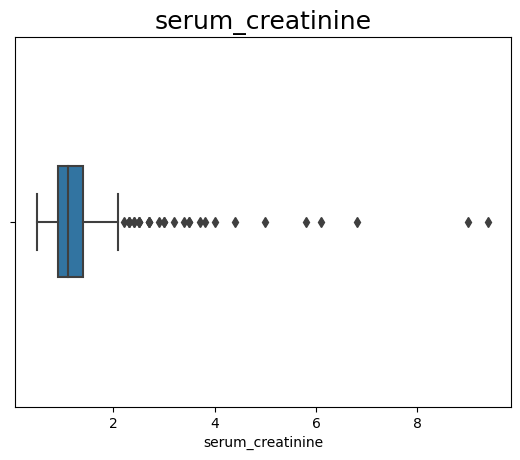

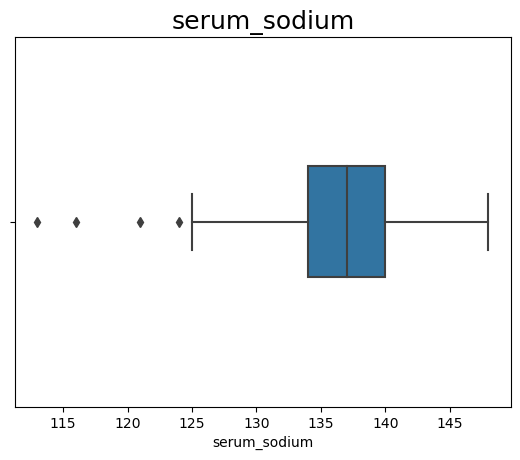

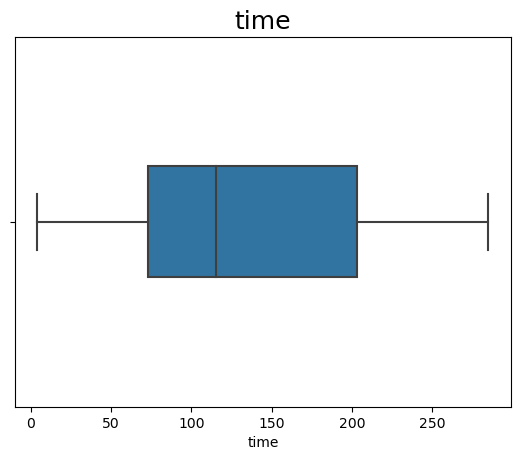

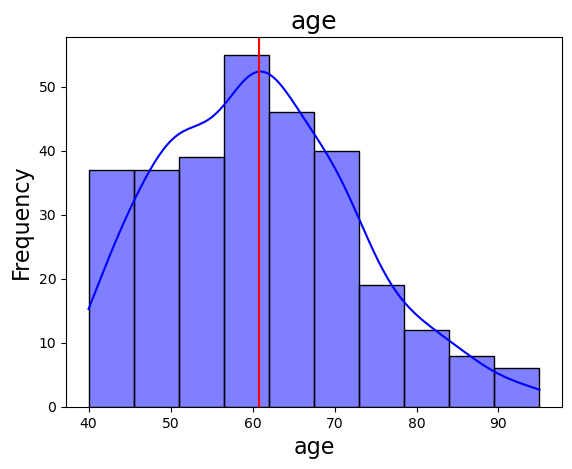

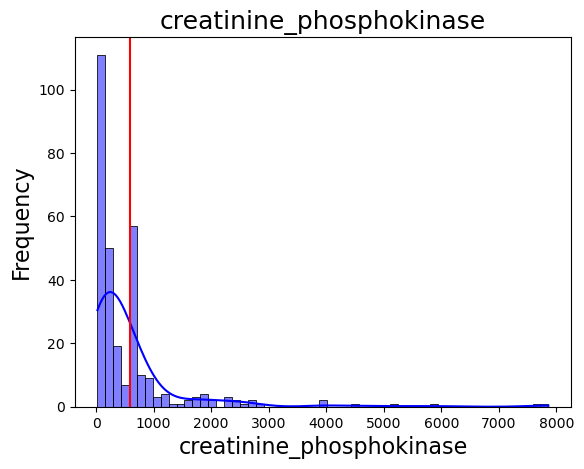

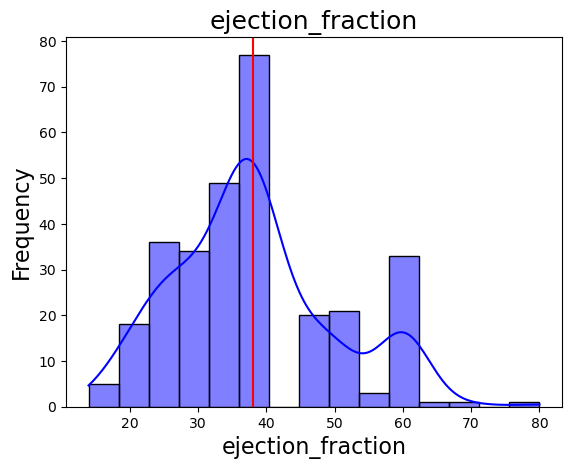

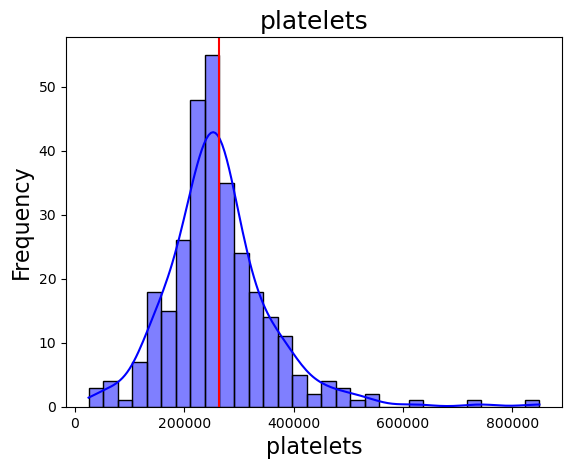

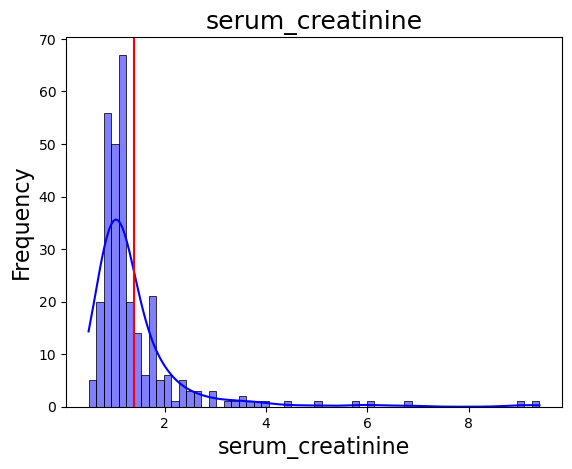

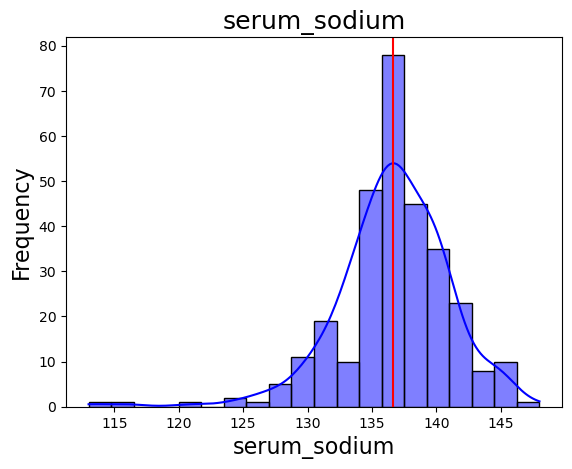

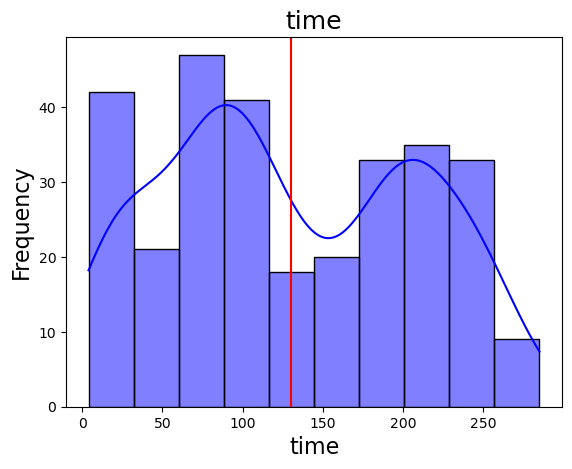

In [5]:
numericft=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
def bplot(x,df):
    sns.boxplot(x=df[x],width=0.3)
    plt.title(x,fontsize=18)
    plt.show()

for i in range(len(numericft)):
    bplot(numericft[i],dfData)

def hplot(x,df):
    sns.histplot(df[x],kde=True,color='blue')
    plt.title(x,fontsize=18)
    plt.xlabel(x,fontsize=16)
    plt.ylabel('Frequency',fontsize=16)
    mean=df[x].mean()
    plt.axvline(mean,color='red')
    plt.show()
    
for i in range(len(numericft)):
    hplot(numericft[i],dfData)

In these plots it is quite clear we have an abundance of outliers and some right/left skew in some of the data. Thus we know some data needs to be removed and there is a possibility that there will be some unforseen problems with some of the skewed data. This might need to result in more deletion of data or transformations of the data by using either a Logistic transformation or a Square-root transformation. However, this depends on further analysis with the models I decide to use.

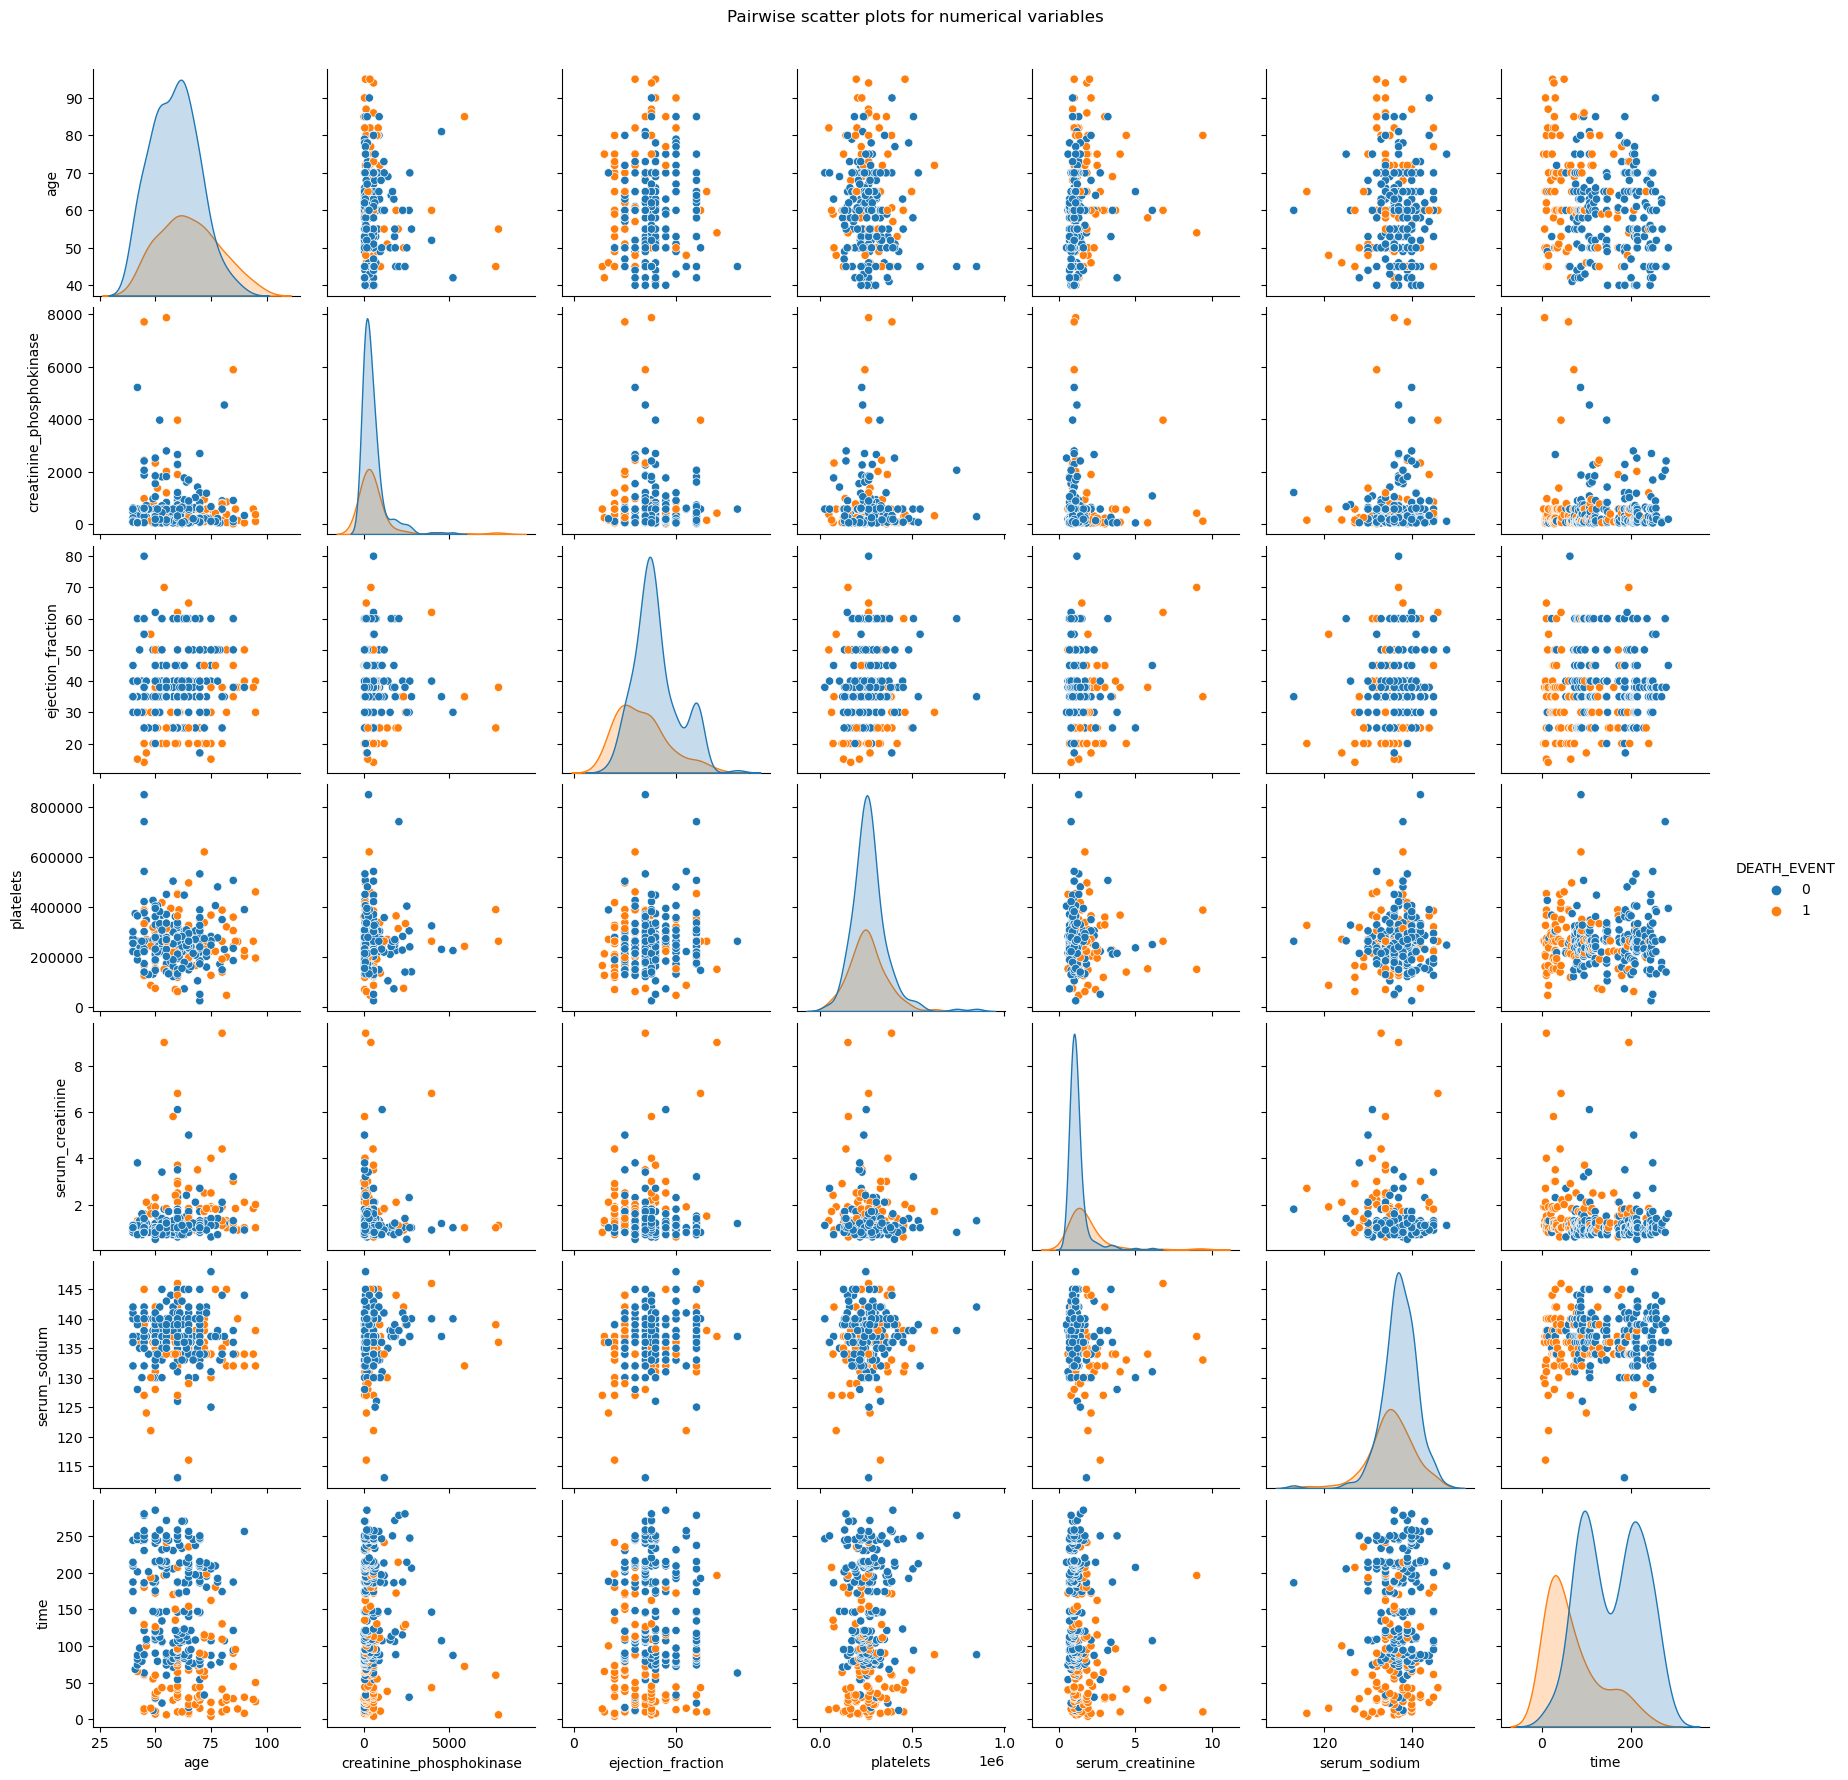

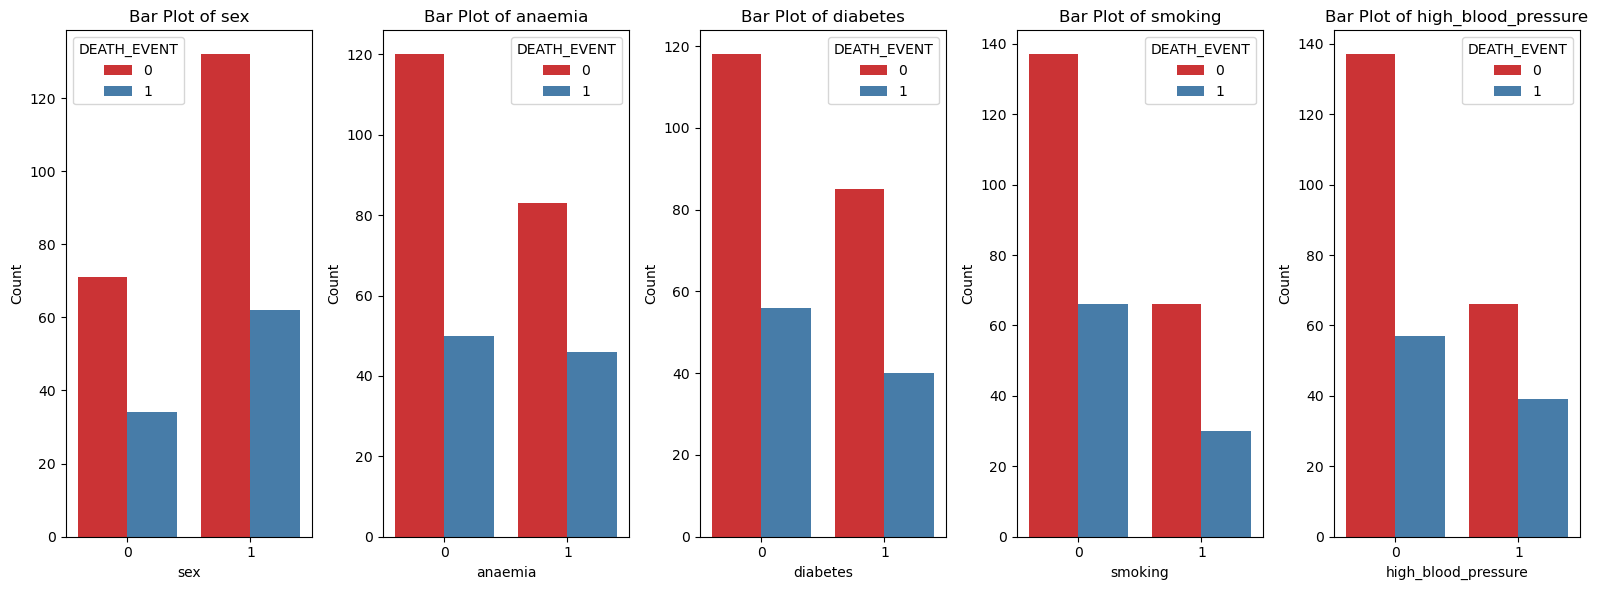

In [6]:
sns.pairplot(dfData,vars=numericft,hue='DEATH_EVENT',diag_kind='kde')
plt.suptitle("Pairwise scatter plots for numerical variables",y=1.02)
plt.show()

categoricalft=['sex','anaemia','diabetes','smoking','high_blood_pressure']
plt.figure(figsize=(16,6))
for i, feature in enumerate(categoricalft, 1):
    plt.subplot(1,5,i)
    sns.countplot(data=dfData,x=feature,hue='DEATH_EVENT',palette='Set1')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {feature}')
plt.tight_layout()
plt.show()


## Correlation Between Numeric Variables 

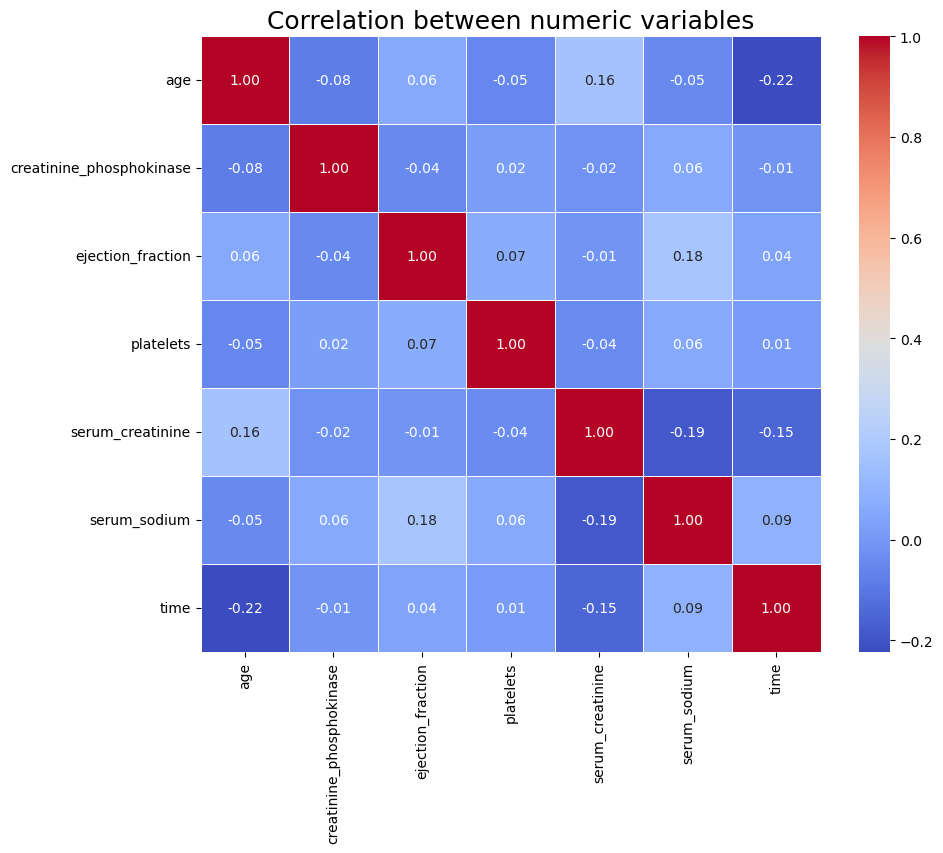

In [7]:
fig,ax=plt.subplots(figsize=(10, 8))
correlation=dfData[numericft].corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5,ax=ax)
plt.title("Correlation between numeric variables",fontsize=18)
plt.show()

In the Correlation Matrix we can see that most of the data have a pretty weak correlation. A good amount of these values are negative and none of them go above .4 which can be useful to indicate multicollinearity problems. 

Since these correlation matrix values show a weak linear relationship I will need to try some different forms of analysis to see patterns in the data. If my model is getting inaccurate results I can either try polynomial regression or non-linear regression.

# Categorial and Numerical Features

## Visualization

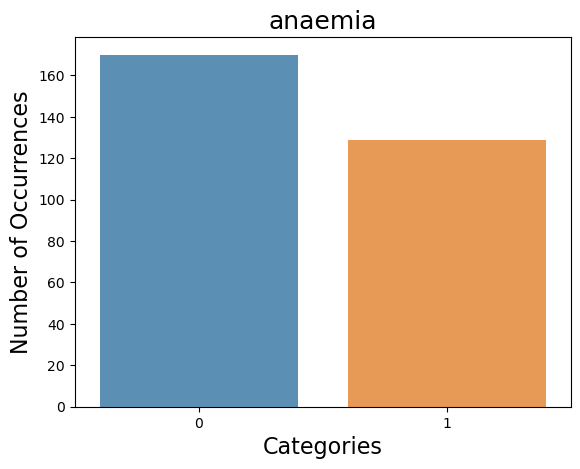

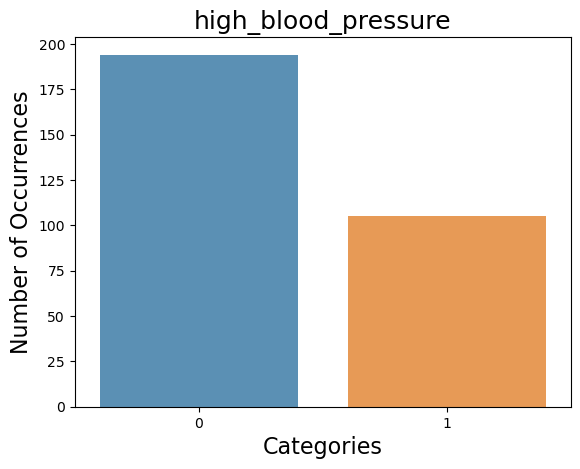

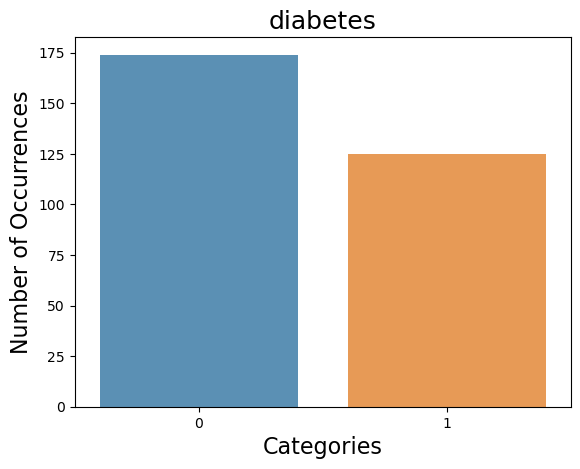

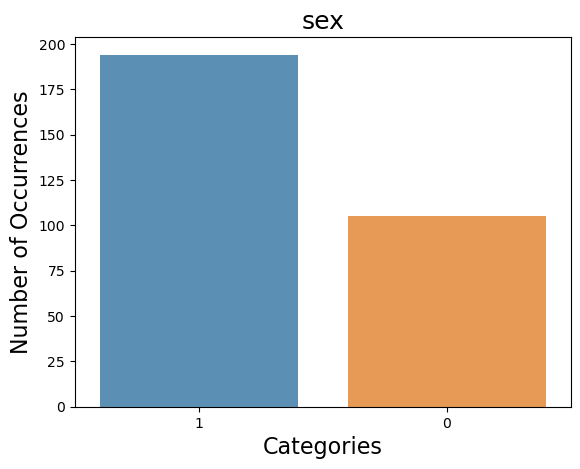

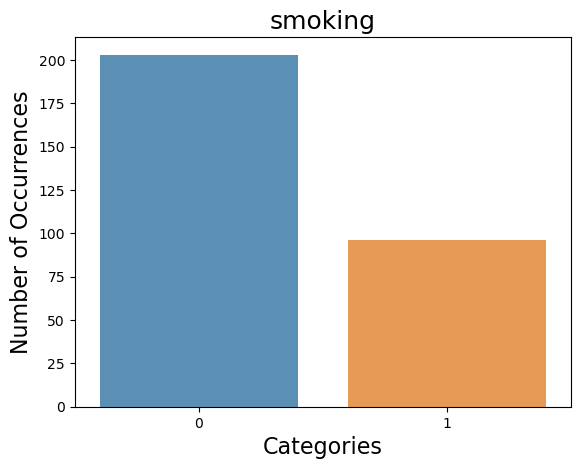

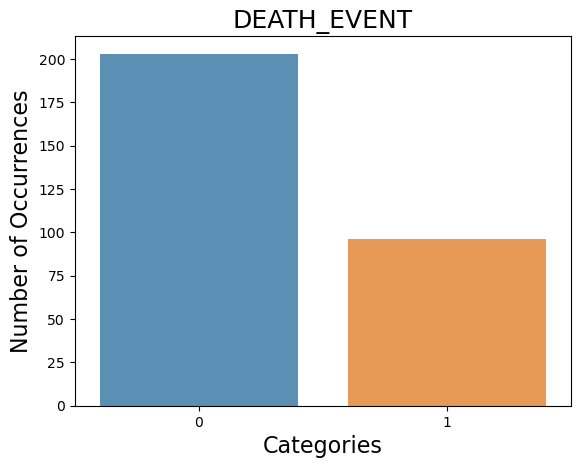

In [8]:
def bplot(x,y,df,col):
    sns.barplot(x=x,y=y,alpha=0.8)
    plt.title(col,fontsize=18)
    plt.xlabel('Categories',fontsize=16)
    plt.ylabel('Number of Occurrences',fontsize=16)
    plt.show()
categoricalft=['anaemia','high_blood_pressure','diabetes','sex','smoking','DEATH_EVENT']
for col in categoricalft:
    x=dfData[col].value_counts().index.astype(str)
    bplot(x, dfData[col].value_counts().values, dfData, col)

<Figure size 800x4000 with 0 Axes>

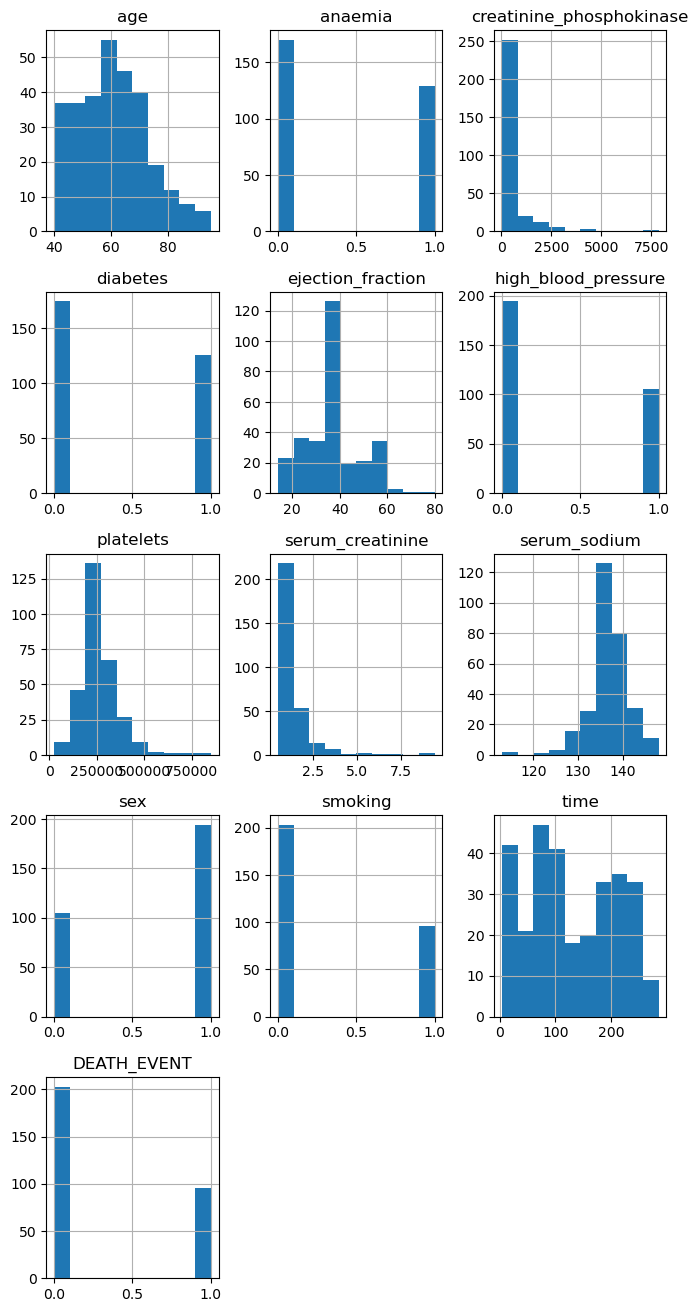

In [9]:
numericalft=dfData.columns[dfData.dtypes!='category']
plt.figure(figsize=(8,40))
dfData.hist(column=numericalft,figsize=(8,40),layout=(12,3))
plt.show()

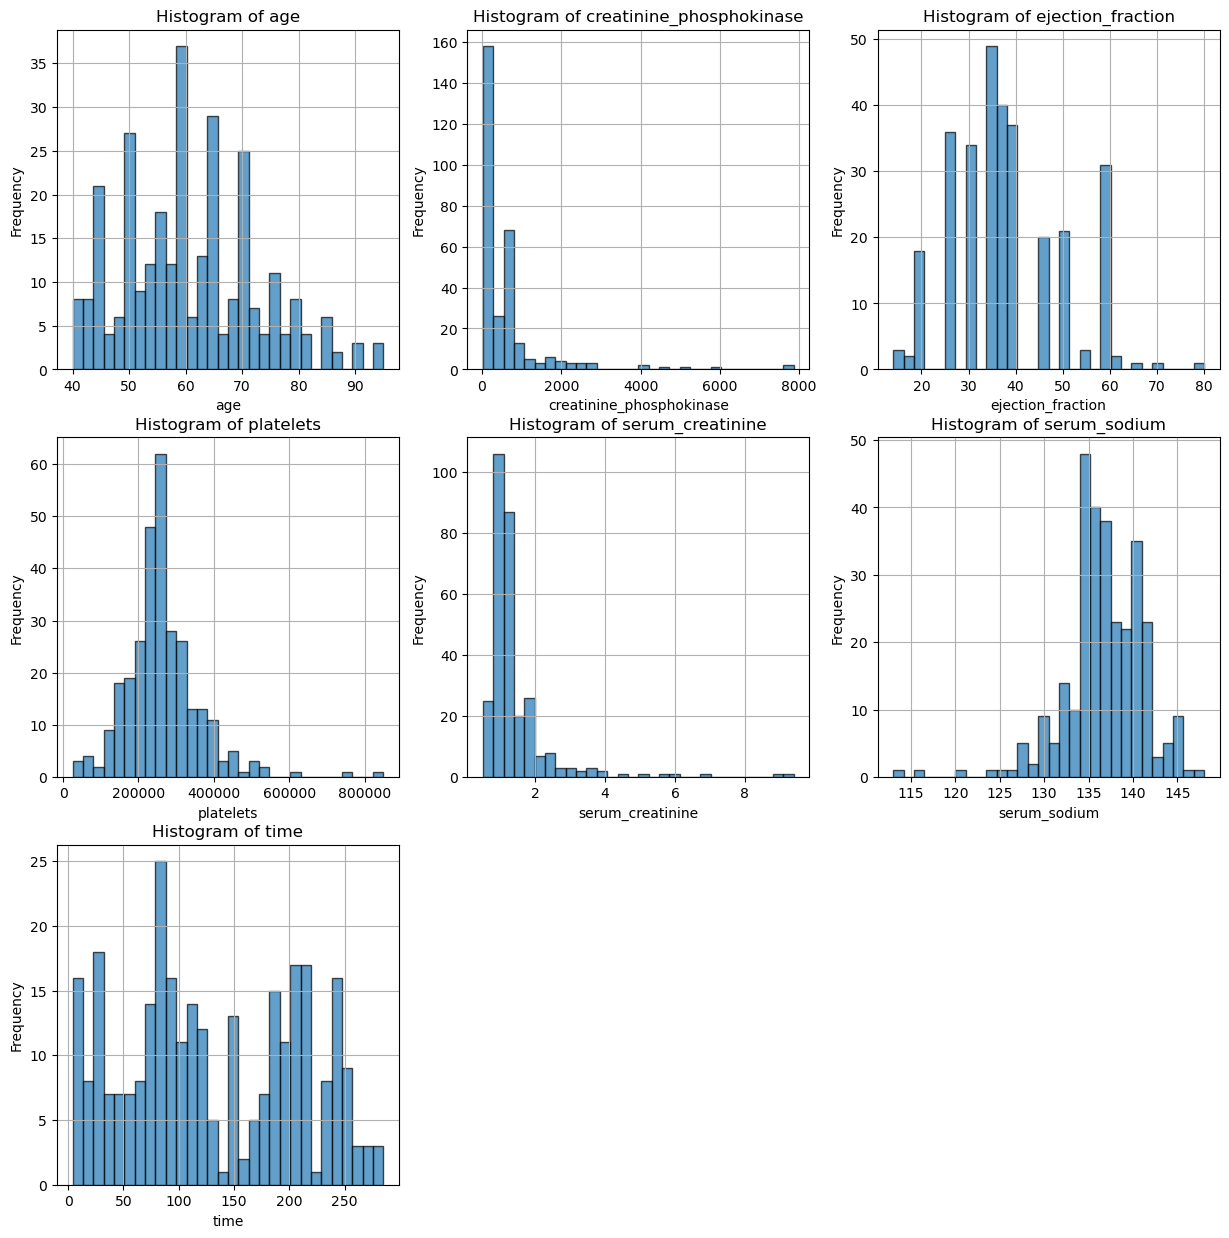

In [10]:
row=(len(numericft)-1)//3+1
cols=min(len(numericft),3)
plt.figure(figsize=(15,5*row))
for i, col in enumerate(numericft):
    plt.subplot(row,cols,i+1)
    dfData[col].hist(bins=30,edgecolor='black',alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
plt.show()

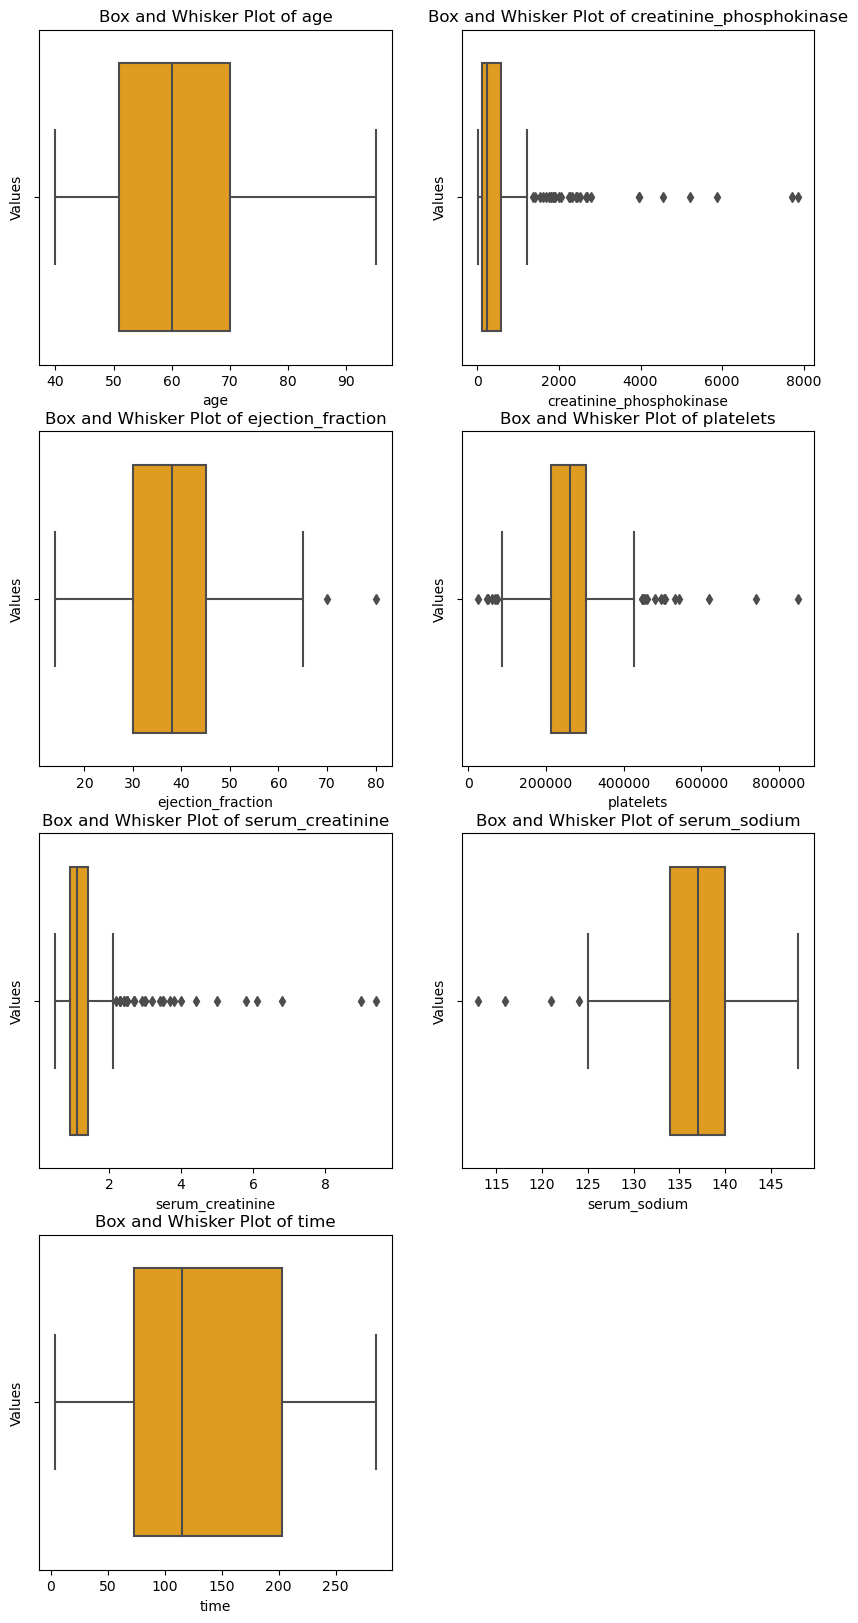

In [11]:
plt.figure(figsize=(10,20))
for i, feature in enumerate(numericft):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=dfData,x=feature,color='orange')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.title('Box and Whisker Plot of '+feature)
plt.show()

# Data Munging: Converting categorial variables into numerical variables

To see what data is correlated with the 'DEATH_EVENT' variable, which is neccesary for analysis, I will be converting categorial variables into numerical variables using the preprocessing.LabelEncoder() and .transform() which results in us being able to see numeric results from a categorial variable.

In [12]:
from sklearn.preprocessing import LabelEncoder
dfData['DEATH_EVENT'].replace([0,1],[0,1],inplace=True)
le=LabelEncoder()
for col in dfData:
    if dfData[col].dtypes=='object':
        le.fit(dfData[col])
        dfData[col]=le.transform(dfData[col])

dfcategorical=dfData[categoricalft]
X=dfcategorical.drop('DEATH_EVENT',axis=1)
y=dfcategorical['DEATH_EVENT']

chiscores,_=chi2(X,y)
listcategorial=list(dfcategorical.drop('DEATH_EVENT',axis=1))
categoricald={}
for i, attr in enumerate(listcategorial):
    categoricald[attr]=chiscores[i]

print("Chi-Squared statistics for categorical variable with respect to 'DEATH_EVENT':")
for attr, chiscore in categoricald.items():
    print(f"{attr}:{chiscore}")

Chi-Squared statistics for categorical variable with respect to 'DEATH_EVENT':
anaemia:0.7465934114891604
high_blood_pressure:1.221538529204786
diabetes:0.0006568144499178924
sex:0.001956265975995817
smoking:0.032346828817734236


# Data Cleaning: Removing Independent Data  

In this portion I will be removing the categories 'sex' and 'diabetes' from my data set since they are not related/dependent to the 'DEATH_EVENT' feature, which is shown above within the chi-2 values. Deleting a category from a data set is simple as there is a .drop() function which gets rid of the data from your dataframe. Since there were no null values in my dataset, deleting these independent events (and some further in my analysis) were used as data cleaning.

In [13]:
cdfData=dfData.drop(columns=['sex','diabetes'])

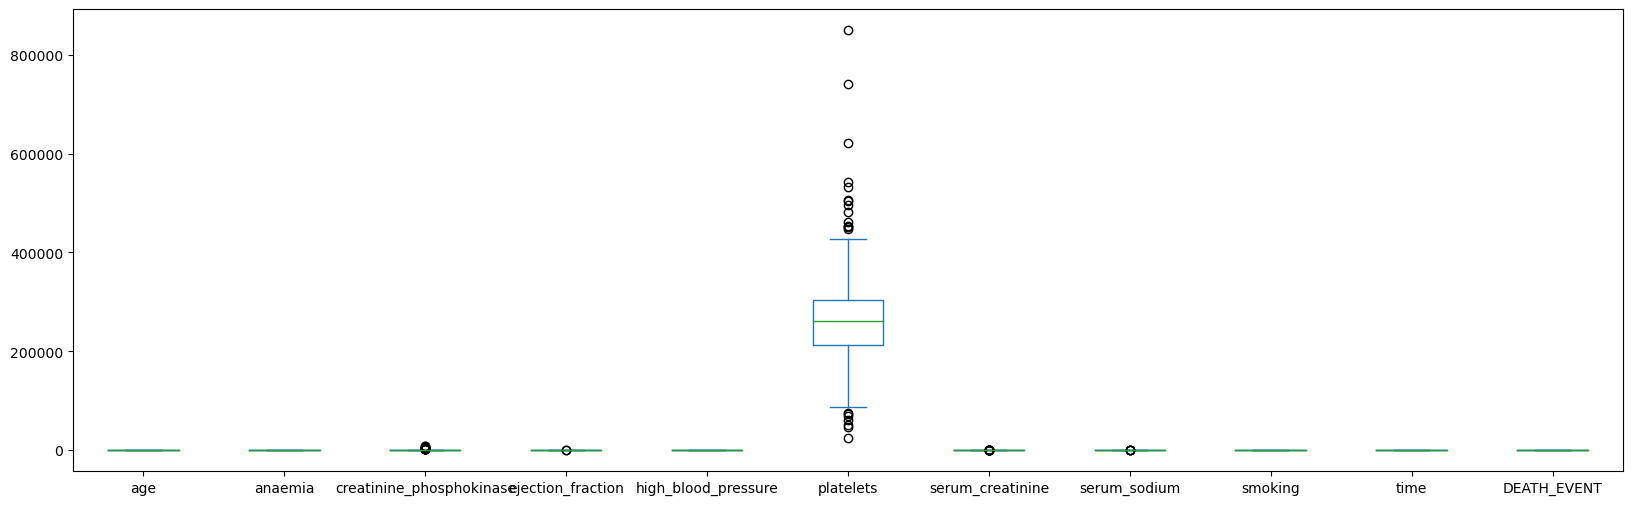

In [14]:
cdfData.plot.box(figsize=(20,6));

## Data Transformations: Scale the Data

As I plan on using K Nearest Neighbors and Logisitc Regression for my model, I need to scale my data to be easier for me to work with since platelets has a much higher value per patient comparde to the ejection_fraction which is hard to work with. Thus I need to scale the data to a scaling from 0 to 1.


# Data Cleaning:Deleting Outliers

To further my data cleaning I can take a look at the box plot above and other plots in my notebook of the data where you can see a lot of outliers. Therefore to make the model a little more accurate I need to delete a these to further clean up the data.


# Inspecting outliers

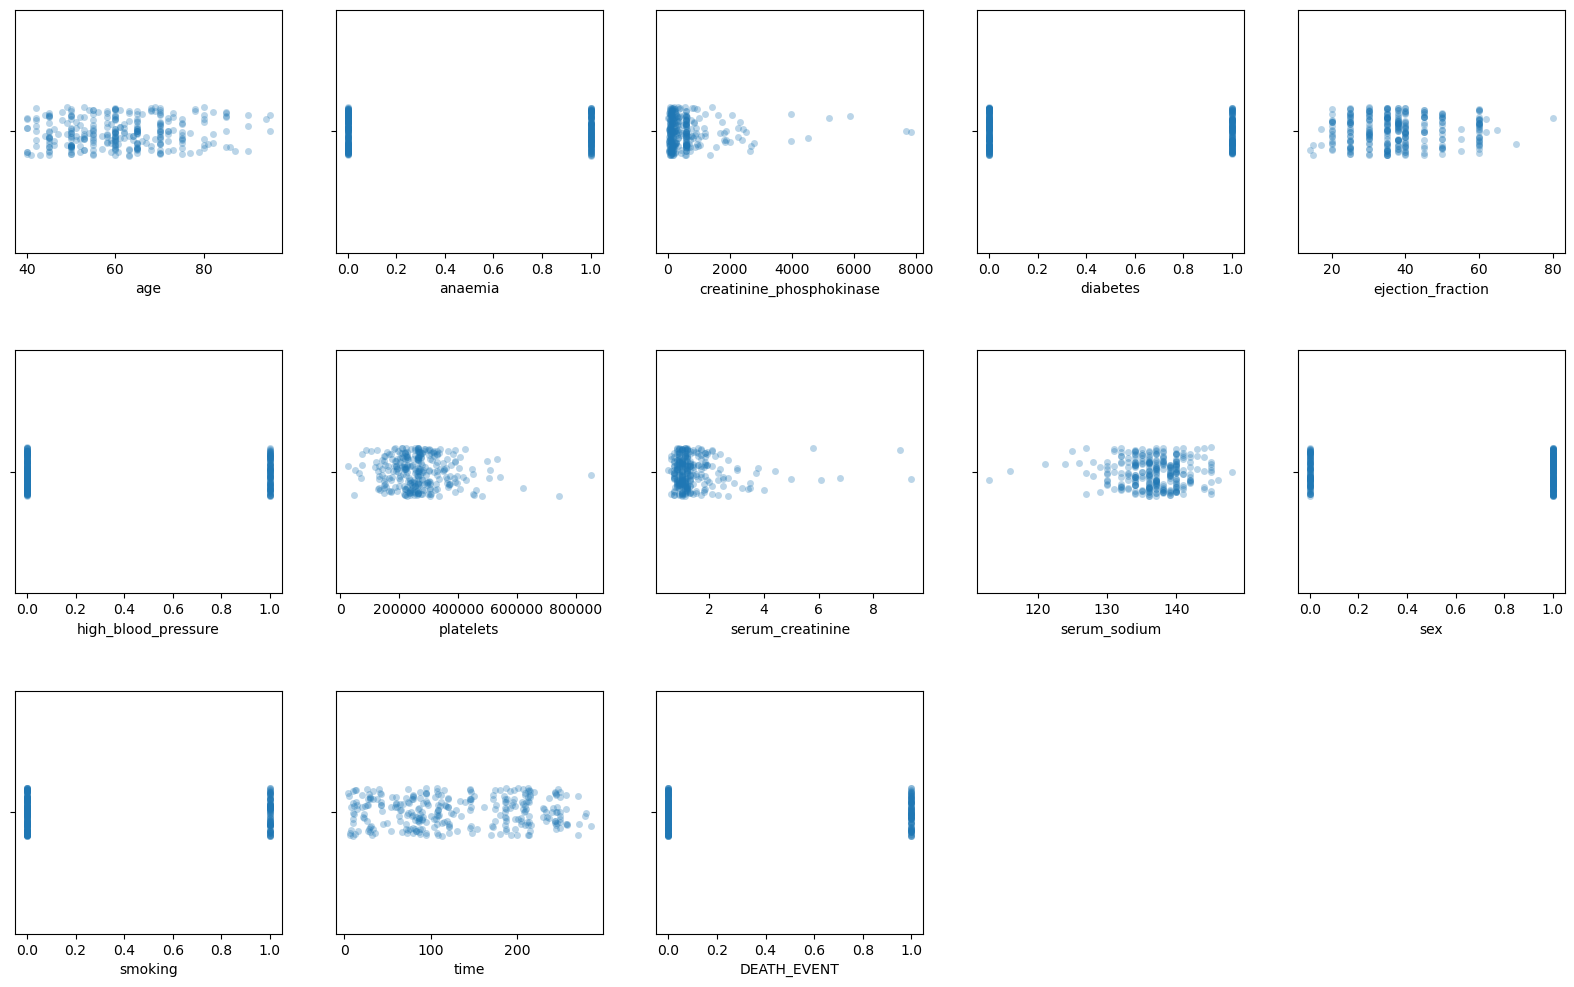

In [15]:
fig,ax=plt.subplots(nrows=3,ncols=5,figsize=(20, 12))
plt.subplots_adjust(hspace=0.4)
a=0
for k in range(3):
    for i in range(5):
        if a<len(dfData.columns):
            sns.stripplot(x=dfData[dfData.columns[a]],jitter=True,alpha=0.3,ax=ax[k][i])
            ax[k][i].set_xlabel(dfData.columns[a])
            a+=1
        else:
            fig.delaxes(ax[k][i])
plt.show()

As we see above there are numerous outliers that we need to remove from the dataset, in hopes of making the data cleaner for analysis and creating a fairly accurate model.

# Data Cleaning: Deleting Outliers

As we can see in the plots above there are some clear outliers that we will need to cut in order to have a clean set of values. To do this I will find a viable point in each variable to set a limit and drop the abberated data. 

I decided to use:
- Age > 89
- Creatine phosphokinase > 4000
- Platelets > 600000
- Serum creatine > 5
- Serum sodium < 127

In [16]:
outlierDf=dfData.loc[(dfData['age']>89)|
                        (dfData['creatinine_phosphokinase']>4000)|
                        (dfData['platelets']>600000)|
                        (dfData['serum_creatinine']>5)|
                        (dfData['serum_sodium']<127)]
print("Conditions used for outlier identification:")
print((dfData['age'] > 89) |
      (dfData['creatinine_phosphokinase'] > 4000) |
      (dfData['platelets'] > 600000) |
      (dfData['serum_creatinine'] > 5) |
      (dfData['serum_sodium'] < 127))
print("Outlier DF:")
print(outlierDf)
outlierDf.head(5)
if not outlierDf.empty:
    lisst=list(outlierDf.index)
    cleandfData=dfData.drop(lisst)
    print(f"The percentage of data points removed from the dataset is {(len(outlierDf)/len(dfData))*100:.2f}%")
else:
    print("No outliers found. The dataset is already clean.")

Conditions used for outlier identification:
0      False
1       True
2      False
3      False
4       True
       ...  
294    False
295    False
296     True
297    False
298    False
Length: 299, dtype: bool
Outlier DF:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
4    65.0        1                       160         1                 20   
5    90.0        1                        47         0                 40   
9    80.0        1                       123         0                 35   
19   48.0        1                       582         1                 55   
26   95.0        1                       112         0                 40   
28   58.0        1                        60         0                 38   
30   94.0        0                       582         1                 38   
36   90.0        1                        60         1                 50   
52   6

# Surived and Deceased Plot

In the following frequency histograms we can analyze the number of survivors compared to deceased passengers per each variable, which can help determine some patter/relationships if there are a certain skew in the plots. 

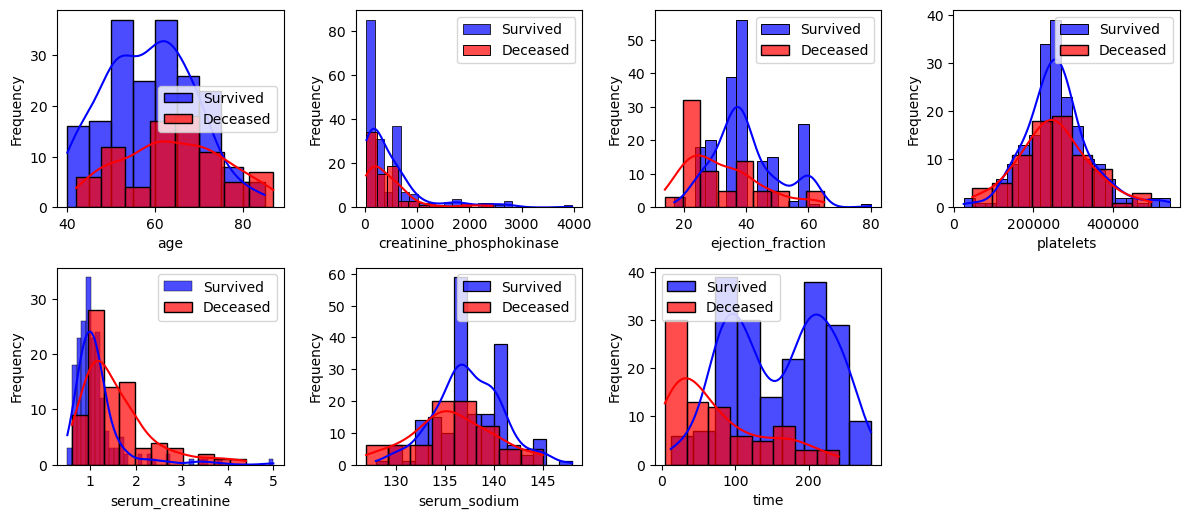

In [17]:
survived=cleandfData.loc[dfData['DEATH_EVENT']==0]
deceased=cleandfData.loc[dfData['DEATH_EVENT']==1]
plt.figure(figsize=(12,10))
for i, feature in enumerate(numericft):
    plt.subplot(4,4,i+1)
    sns.histplot(survived[feature],kde=True,color='blue',label='Survived',alpha=0.7)
    sns.histplot(deceased[feature],kde=True,color='red',label='Deceased',alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

The biggest insight shown from these plots are in the time post hospital visit, where there are way more deaths compared to survivors under the 100 day period. 

# Split into training/testing sets

In [18]:
clean=cleandfData.values
X=dfData.drop('DEATH_EVENT',axis=1)
y=dfData['DEATH_EVENT']
trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(trainx.shape)
print(testx.shape)

(239, 12)
(60, 12)


# Data Scaling 0 to 1

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))
scaledtrainx=scaler.fit_transform(trainx)
scaledtestx=scaler.fit_transform(testx)

# Checking for multicollinearity

In [21]:
dfData=add_constant(dfData)
vifs=pd.Series([variance_inflation_factor(dfData.values,i) for i in range(dfData.shape[1])],index=dfData.columns)
print(vifs)

const                       1109.602518
age                            1.142955
anaemia                        1.087178
creatinine_phosphokinase       1.074681
diabetes                       1.065035
ejection_fraction              1.173948
high_blood_pressure            1.068743
platelets                      1.046335
serum_creatinine               1.142248
serum_sodium                   1.110742
sex                            1.344985
smoking                        1.285105
time                           1.490738
DEATH_EVENT                    1.714784
dtype: float64


Since all of the used variables in the data set used have a VIF value way less than 5, besides the constant, I know multicollinearity is not a problem for my dataset which will benefit my logisitic regression model that I believe can work well on my binary otucome.

# Dimensionality

In [22]:
dims=[2,10,100,1000,10000]
for dim in dims:
    points=np.random.rand(2,dim)
    distance=np.linalg.norm(points[0]-points[1])
    print(f"Distance between two points in {dim}D space: {distance}")

Distance between two points in 2D space: 0.5335518193780622
Distance between two points in 10D space: 1.0373271971265259
Distance between two points in 100D space: 4.388360886973934
Distance between two points in 1000D space: 12.557344652437463
Distance between two points in 10000D space: 40.78108050759659


Since we know that as the number of features of a dataset increases, the average distance between pairs of data points increases exponentially. And as we can see above the distances are getting exponentially higher which can significantly impact the performance of various machine learning models like KNN. Therefore we know the KNN model is definitley going to be less accurate then the regression.

# Proposed Models

I want to make a few models to see which one is optimal for having a more accurate predicition. I believe trying a KNN model and a Logisitc Regression model would be two viable options however see some problems in the accuracy of the KNN model as the distance between pairs in increaseasing as shown above. I will also make a decision tree model to help visualize and see if their is a very visible pattern I can work into my model.


## KKN and Logistic Regression
#### These models are both used for binary outcomes
For the KKN and Logisitc Regression model, I have already converted all the categorical variables into numerical representations. I have also standardized the numeric features to be from 0 to 1 making this data scaled, which means I need to split the data into different features (X) and target variables (Y). Next, for both of the models, all I need to do is split the data into their respective training and testing sets to analyze each of there performance and make predictions.



One of the main problems I can run into with both of these models is imbalanced classes which can sway a model in the favor of the dominating class from the imbalance. This problem might lead me to using different evaluation methods or more in depth algortihms like SMOTE.

In [23]:
X=dfData.drop('DEATH_EVENT',axis=1)
y=dfData['DEATH_EVENT']
model=LogisticRegression()
model.fit(trainx,trainy)
pred=model.predict(testx)
macc=accuracy_score(testy,pred)
mprec=precision_score(testy,pred)
mrecall=recall_score(testy,pred)
mf1=f1_score(testy,pred)
maucroc=roc_auc_score(testy,pred)
print("Logistic Regression Performance:")
print(f"Accuracy: {macc}")
print(f"Precision: {mprec}")
print(f"Recall: {mrecall}")
print(f"F1-score: {mf1}")
print(f"AUC-ROC: {maucroc}")
print("\n")

Logistic Regression Performance:
Accuracy: 0.8
Precision: 0.8823529411764706
Recall: 0.6
F1-score: 0.7142857142857143
AUC-ROC: 0.7714285714285715




# Logisitc Regression with feature scaling, and interpretation of feature coefficients

In [24]:
from sklearn.metrics import confusion_matrix
data=dfData.dropna()
X=data.drop('DEATH_EVENT', axis=1)
y=data['DEATH_EVENT']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
Xtrscaled=scaler.fit_transform(Xtrain)
Xtscaled=scaler.transform(Xtest)
model=LogisticRegression()
model.fit(Xtrscaled,ytrain)
pred=model.predict(Xtscaled)
predpa=model.predict_proba(Xtscaled)[:,1]
accuracy=accuracy_score(ytest,pred)
precision=precision_score(ytest,pred)
f1=f1_score(ytest,pred)
aucroc=roc_auc_score(ytest,predpa)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {aucroc:.4f}")
print(confusion_matrix(ytest,pred))
coefficients_df=pd.DataFrame(data={"Feature": X.columns,"Coefficient":model.coef_[0]})
print(coefficients_df.sort_values(by="Coefficient",ascending=False))

Accuracy: 0.7889
Precision: 0.8750
F1 Score: 0.6885
AUC-ROC: 0.8312
[[50  3]
 [16 21]]
                     Feature  Coefficient
8           serum_creatinine     0.784320
1                        age     0.666943
11                   smoking     0.175349
3   creatinine_phosphokinase     0.071045
4                   diabetes     0.061125
0                      const     0.000000
6        high_blood_pressure    -0.101217
2                    anaemia    -0.158562
7                  platelets    -0.178841
9               serum_sodium    -0.255385
10                       sex    -0.491353
5          ejection_fraction    -0.849566
12                      time    -1.691787


As we can see above serum_creatinine and age has a high correlation coefficient compared to the death event outcome. Leaving us with a overall accurate model that can still be improved by future analysis.

# K-Nearest Neighbors

In [25]:
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(trainx,trainy)
kpred=knn.predict(testx)
kacc=accuracy_score(testy,kpred)
kprec=precision_score(testy,kpred)
krecall=recall_score(testy,kpred)
kf1=f1_score(testy,kpred)
kaucroc=roc_auc_score(testy,kpred)
print("KNN Performance:")
print(f"Accuracy: {kacc}")
print(f"Precision: {kprec}")
print(f"Recall: {krecall}")
print(f"F1-score: {kf1}")
print(f"AUC-ROC: {kaucroc}")

KNN Performance:
Accuracy: 0.5333333333333333
Precision: 0.36363636363636365
Recall: 0.16
F1-score: 0.2222222222222222
AUC-ROC: 0.48


# Optimize K

In order to utilize knn I need find the best k value, therfore I will run a loop to find which k value and seed for reproducibility provides the highest accuracy.

In [26]:
bestk=1
bestseed=0
bestacc=0
kvals=range(1,31)
seedvalues=range(0,101)
X=data[['high_blood_pressure','serum_creatinine']]
y=data['DEATH_EVENT']
for seed in seedvalues:
    trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.3,random_state=seed)
    for k in kvals:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(trainx,trainy)
        pred=knn.predict(testx)
        accuracy=metrics.accuracy_score(testy,pred)
        if accuracy>bestacc:
            bestacc=accuracy
            bestk=k
            bestseed=seed
print(f"Best seed: {bestseed}")
print(f"Best k value: {bestk}")
print(f"Best accuracy: {bestacc:.4f}")


Best seed: 84
Best k value: 23
Best accuracy: 0.8444


# KNN with Optimized Seed and K

In [27]:
Xtrain,Xtest,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=84)
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(Xtrain,y_train)
pred=knn.predict(Xtest)
preda=knn.predict_proba(Xtest)[:,1]
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred)
recall=recall_score(y_test,pred)
f1=f1_score(y_test,pred)
aucroc=roc_auc_score(ytest,preda)
print("KNN Model Performance with Best Seed and k value:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {aucroc:.4f}")

KNN Model Performance with Best Seed and k value:
Accuracy: 0.8444
Precision: 0.7600
Recall: 0.7037
F1-score: 0.7308
AUC-ROC: 0.4176


# Analysis on KNN and Logisitc

As shown by the two models above the Logistic Regression is farly more accurate then the KNN model and the optimized KNN model which were innacurate. However, these models are a sufficient start to be implemented for prediciting heart failure related dealths but can and will be improved in the future. Thus, I attempt to incorporate one more round of featured engineering to achieve a better model. To do this I dropped all of the irrelevant data that did not help the accuracy of the model.

In [28]:
irrelevant=['anaemia','high_blood_pressure','platelets']
clean=dfData.drop(irrelevant,axis=1)
Xcleaned=clean.drop('DEATH_EVENT',axis=1)
ycleaned=clean['DEATH_EVENT']
scaler=StandardScaler()
sXcleaned=scaler.fit_transform(Xcleaned)
Xtrainc,Xtestc,ytrainc,ytestc=train_test_split(sXcleaned,ycleaned,test_size=0.2,random_state=42)
modelc=LogisticRegression(max_iter=1000)
modelc.fit(Xtrainc,ytrainc)
ypredc=modelc.predict(Xtestc)
cacc=accuracy_score(ytestc,ypredc)
cprec=precision_score(ytestc,ypredc)
crecall=recall_score(ytestc,ypredc)
cf1=f1_score(ytestc,ypredc)
print("Performance Metrics with Removed Irrelevant Features:")
print(f"Accuracy: {cacc}")
print(f"Precision: {cprec}")
print(f"Recall: {crecall}")
print(f"F1-score: {cf1}")

Performance Metrics with Removed Irrelevant Features:
Accuracy: 0.8
Precision: 0.9333333333333333
Recall: 0.56
F1-score: 0.7000000000000001


Removing the irrelevant features I identified from the data set has shown a little increase in precision. However this featured engineering did not help the accuracy of the model in the ways I desired

# Decision Tree

Since my model is based on the binary outcome of the variable 'DEATH_EVENT' a decision tree is a very viable option for predicition, which will also help me get a good visualization that provides some insight into the importance of each feature in predicting the factors are most indicative of heart failure deaths, which I will try to incorporate into my regression model to better it.

Decision Tree Accuracy: 0.6500
              precision    recall  f1-score   support

    Survived       0.67      0.80      0.73        35
        Dead       0.61      0.44      0.51        25

    accuracy                           0.65        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.65      0.64        60



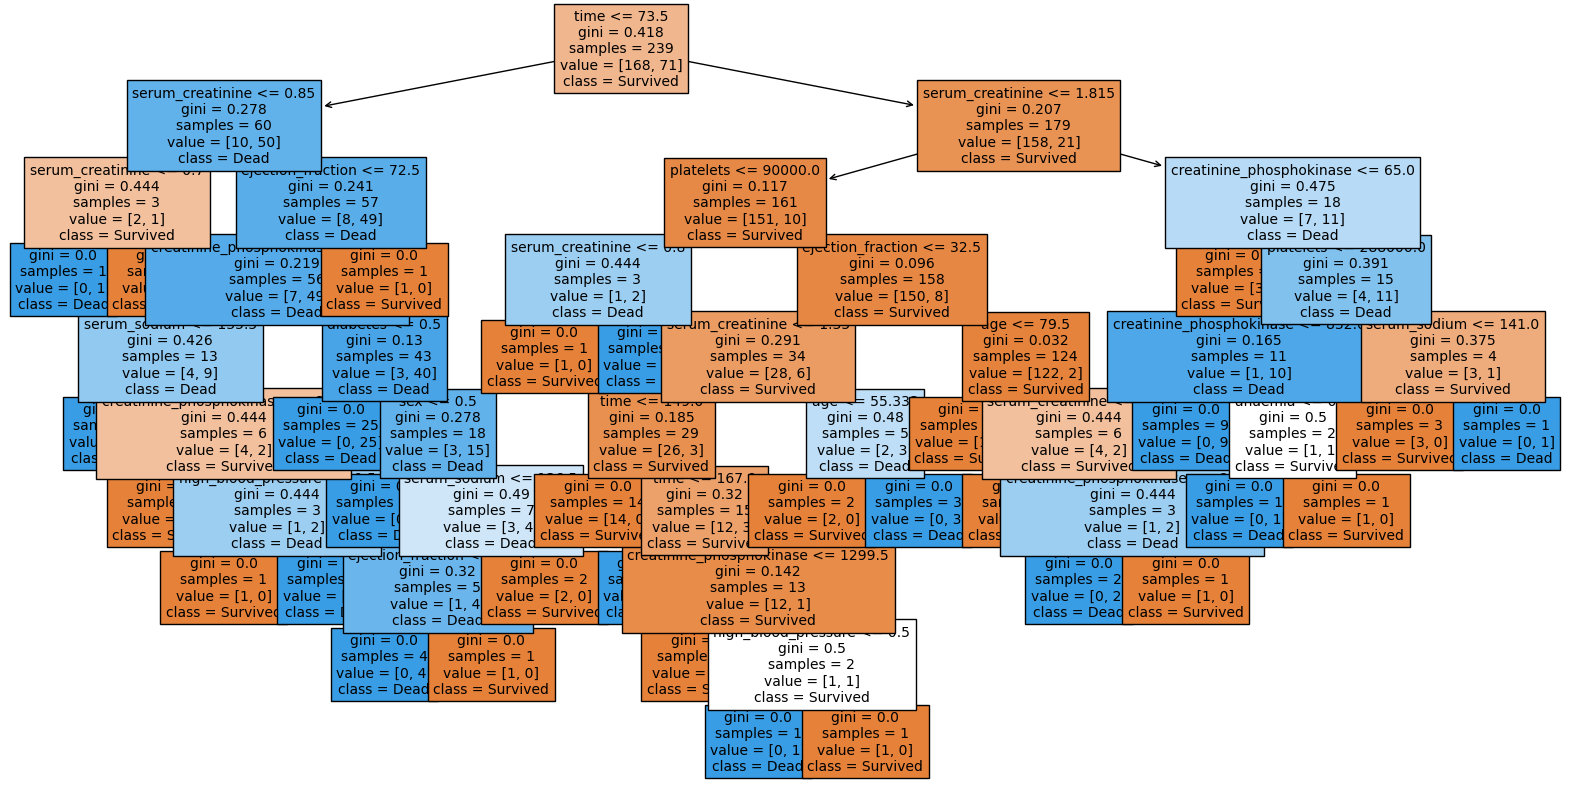

In [29]:
X=dfData.drop('DEATH_EVENT',axis=1)
y=dfData['DEATH_EVENT']
Xtrain, Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain,ytrain)
pred=dt.predict(Xtest)
acc=accuracy_score(ytest,pred)
print(f"Decision Tree Accuracy: {acc:.4f}")
info=classification_report(ytest,pred, target_names=['Survived','Dead'])
print(info)
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=X.columns,class_names=['Survived','Dead'],filled=True,fontsize=10)
plt.show()

The decision tree does not really provide any visible insight as the plots are all mixed between survived and deceased as well as the model it self being only 65% accurate. The only visible aspect is that there is a skew on the left of more deceased patients then on the right side of the first decision. However, I already uncovered previously that patients that spent under 100 days in the follow up period had a lot more deaths. 

This aspect will not be implemented currently for my models, however, can be used for insight on a further analysis of this project.

# Conclusion

Throughout this project I have dived deep into my comprehensive analysis of the heart_failure.csv dataset. After my initial first exploration, I prepped the data for modeling, trying to ensure that it represented the underlying patterns accurately. Throughout my exploration I did a lot of data cleaning and EDA looking at plots/visualizations trying to pick up a pattern between variables if possible, which I found some irrelevant data I dropped from the data set and set limits for some variables for outliers. I then built a linear regression model, which offered insight into the significance of a few features and disignifcange of other, which I eventually dropped giving me a more accurate result. Additionally, my exploration with the K-Nearest Neighbors algorithm showcased the importance of hyperparameter tuning, with \( k = 23 \) and the seed for reproducing being 84, emerging as the most optimal choices to use for my KNN model, which helped the accuracy a lot more then the first KNN I ran with a basic k value = 3. I employed various different metrics to evaluate each models performance, emphasizing the model's validity and areas of potential improvement needed before a full implementation in the healthcare world. As I reflect upon the findings further, it's evident that understanding the data, coupled with iterative model building and evaluation, were very vital components in deriving meaningful insights and predictions. Moving forward, further tuning and exploration with other algorithms might enhance prediction accuracy and provide a more in-depth understanding of factors influencing heart health. Overall I had a great experience learning how to perform data cleaning, EDA, and producing a model that is fitting for a specific problem set/ data set. 

# Suggested Improvement to Further My Project

- For the Decision Tree
    - More Data Pruning could help remove parts of the tree that do not provide significance in predicting target values. It can also prevent overfitting.
    - Better Feature Engineering since some important features can significantly improve the performance of a decision tree. I can either create polynomial features, interaction terms, or domain specific features.
    - Handling Imbalanced Data using techniques like SMOTE.
    - Limiting the depth of the tree can also help me reduce overfitting.
    
- K-Nearest Neighbors
    - Weighted Voting: Instead of a simple majority vote, I can delegate closer neighbors to have more weight in the voting process.
    - I can experiment with different distance metrics such as Euclidean, Manhattan and/or Minkowski.

- Logisitc Regression
    - I can use either L1 or L2 regularization to prevent overfitting which can potentially improve the performance.
    - Just like the decision tree- better feature engineering can benefit from domain specific features, polynomial features, or interaction terms.
    - Just like KNN I can try adjusting the class weights if the dataset is imbalanced.
    - If the data is imbalanced I can increase the size of the dataset by creating new data points.